In [1]:
from google.colab import files
uploaded = files.upload()

Saving clubhouse_sentiment.csv to clubhouse_sentiment.csv
Saving orkut_sentiment.csv to orkut_sentiment.csv
Saving skype_sentiment.csv to skype_sentiment.csv
Saving yahoo_sentiment.csv to yahoo_sentiment.csv
Saving Yahoo_reddit.csv to Yahoo_reddit.csv
Saving Orkut_reddit.csv to Orkut_reddit.csv
Saving ClubhouseApp_reddit.csv to ClubhouseApp_reddit.csv
Saving skype_reddit.csv to skype_reddit.csv
Saving skype_vs_teams.csv to skype_vs_teams.csv
Saving clubhouse_trends.csv to clubhouse_trends.csv
Saving yahoo_ vs_facebook.csv to yahoo_ vs_facebook.csv
Saving orkut_trends.csv to orkut_trends.csv


In [12]:
import pandas as pd

# Orkut
orkut_trends = pd.read_csv('orkut_trends.csv')
orkut_reddit = pd.read_csv('Orkut_reddit.csv')
orkut_sentiment = pd.read_csv('orkut_sentiment.csv')

# Yahoo
vine_trends = pd.read_csv('/content/yahoo_ vs_facebook.csv')
vine_reddit = pd.read_csv('Yahoo_reddit.csv')
vine_sentiment = pd.read_csv('yahoo_sentiment.csv')

# Skype
skype_trends = pd.read_csv('/content/skype_vs_teams.csv')
skype_reddit = pd.read_csv('skype_reddit.csv')
skype_sentiment = pd.read_csv('skype_sentiment.csv')

# Clubhouse
clubhouse_trends = pd.read_csv('clubhouse_trends.csv')
clubhouse_reddit = pd.read_csv('/content/ClubhouseApp_reddit.csv')
clubhouse_sentiment = pd.read_csv('clubhouse_sentiment.csv')


In [13]:
print("🔍 Orkut Trends Columns:", orkut_trends.columns)
print("🔍 Orkut Reddit Columns:", orkut_reddit.columns)
print("🔍 Orkut Sentiment Columns:", orkut_sentiment.columns)


🔍 Orkut Trends Columns: Index(['Category: All categories'], dtype='object')
🔍 Orkut Reddit Columns: Index(['Happy Birthday to Orkut!'], dtype='object')
🔍 Orkut Sentiment Columns: Index(['text', 'sentiment'], dtype='object')


In [14]:
# Show first few rows
orkut_trends.head()


Category: All categories
Month       "Orkut": (Worldwide)
2004-01                       <1
2004-02                        1
2004-03                        1
2004-04                        1

In [16]:
# Rename columns
orkut_trends = pd.read_csv('orkut_trends.csv', skiprows=1)
orkut_trends.columns = ['month', 'interest']
orkut_trends['interest'] = orkut_trends['interest'].replace('<1', 0.5).astype(float)
orkut_trends['month'] = pd.to_datetime(orkut_trends['month'])

# Yahoo (from "yahoo_ vs_facebook.csv")
yahoo_trends = pd.read_csv('yahoo_ vs_facebook.csv', skiprows=1)
yahoo_trends = yahoo_trends[['Month', 'yahoo: (Worldwide)']]
yahoo_trends.columns = ['month', 'interest']
yahoo_trends['interest'] = yahoo_trends['interest'].replace('<1', 0.5).astype(float)
yahoo_trends['month'] = pd.to_datetime(yahoo_trends['month'])

# Skype (from "skype_vs_teams.csv")
skype_trends = pd.read_csv('skype_vs_teams.csv', skiprows=1)
skype_trends = skype_trends[['Month', 'skype: (Worldwide)']]
skype_trends.columns = ['month', 'interest']
skype_trends['interest'] = skype_trends['interest'].replace('<1', 0.5).astype(float)
skype_trends['month'] = pd.to_datetime(skype_trends['month'])

# Clubhouse
clubhouse_trends = pd.read_csv('clubhouse_trends.csv', skiprows=1)
clubhouse_trends.columns = ['month', 'interest']
clubhouse_trends['interest'] = clubhouse_trends['interest'].replace('<1', 0.5).astype(float)
clubhouse_trends['month'] = pd.to_datetime(clubhouse_trends['month'])

In [17]:
orkut_reddit = pd.read_csv('Orkut_reddit.csv')
orkut_reddit.columns


Index(['Happy Birthday to Orkut!'], dtype='object')

In [18]:
orkut_reddit = pd.read_csv('Orkut_reddit.csv')
orkut_reddit.columns = ['text']

#  removingg rows with null or empty text
orkut_reddit.dropna(subset=['text'], inplace=True)
orkut_reddit = orkut_reddit[orkut_reddit['text'].str.strip() != '']

# Preview
orkut_reddit.head()


text
0                                          Piklix123
1                                O retorno do Orkut?
2                                    Orkut Nostalgia
3                            Mais um design do Orkut
4  relembre os clássicos joguinhos do Orkut. como...

In [19]:
import pandas as pd



# Clubhouse
clubhouse_reddit = pd.read_csv('ClubhouseApp_reddit.csv')
clubhouse_reddit.columns = ['text']
clubhouse_reddit.dropna(subset=['text'], inplace=True)
clubhouse_reddit = clubhouse_reddit[clubhouse_reddit['text'].str.strip() != '']

# Skype
skype_reddit = pd.read_csv('skype_reddit.csv')
skype_reddit.columns = ['text']
skype_reddit.dropna(subset=['text'], inplace=True)
skype_reddit = skype_reddit[skype_reddit['text'].str.strip() != '']

# Yahoo
yahoo_reddit = pd.read_csv('Yahoo_reddit.csv')
yahoo_reddit.columns = ['text']
yahoo_reddit.dropna(subset=['text'], inplace=True)
yahoo_reddit = yahoo_reddit[yahoo_reddit['text'].str.strip() != '']

In [20]:
sentiment = pd.read_csv('orkut_sentiment.csv')
print(sentiment.columns)
sentiment.head()


Index(['text', 'sentiment'], dtype='object')


text  sentiment
0                                          Piklix123        0.0
1                                O retorno do Orkut?        0.0
2                                    Orkut Nostalgia        0.0
3                            Mais um design do Orkut        0.0
4  relembre os clássicos joguinhos do Orkut. como...        0.0

In [21]:


# Clubhouse sentiment
clubhouse_sentiment = pd.read_csv('clubhouse_sentiment.csv')
clubhouse_sentiment.dropna(inplace=True)
clubhouse_sentiment['sentiment'] = clubhouse_sentiment['sentiment'].astype(float)

# Skype sentiment
skype_sentiment = pd.read_csv('skype_sentiment.csv')
skype_sentiment.dropna(inplace=True)
skype_sentiment['sentiment'] = skype_sentiment['sentiment'].astype(float)

# Yahoo sentiment
yahoo_sentiment = pd.read_csv('yahoo_sentiment.csv')
yahoo_sentiment.dropna(inplace=True)
yahoo_sentiment['sentiment'] = yahoo_sentiment['sentiment'].astype(float)


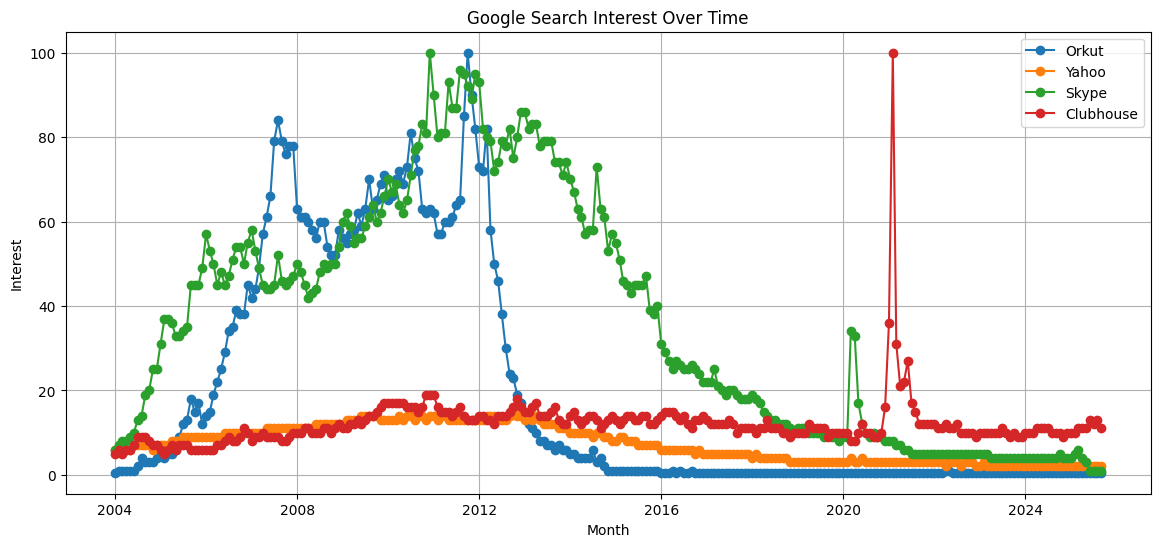

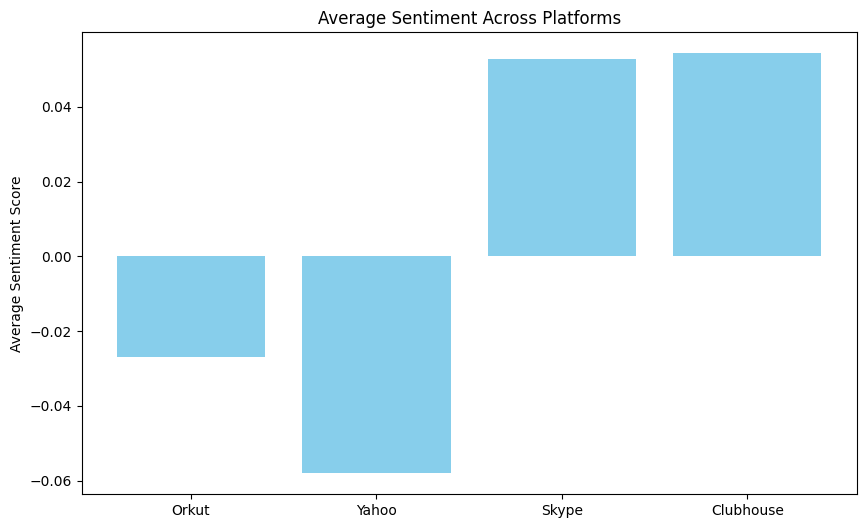

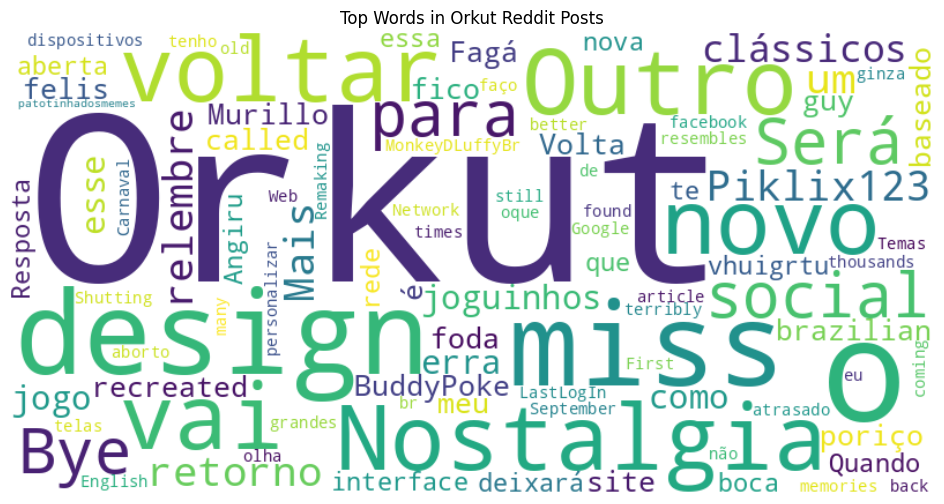

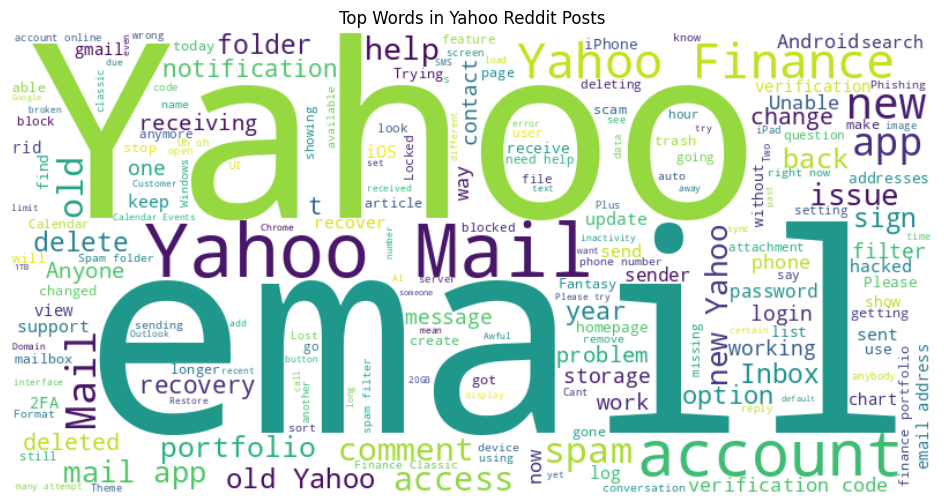

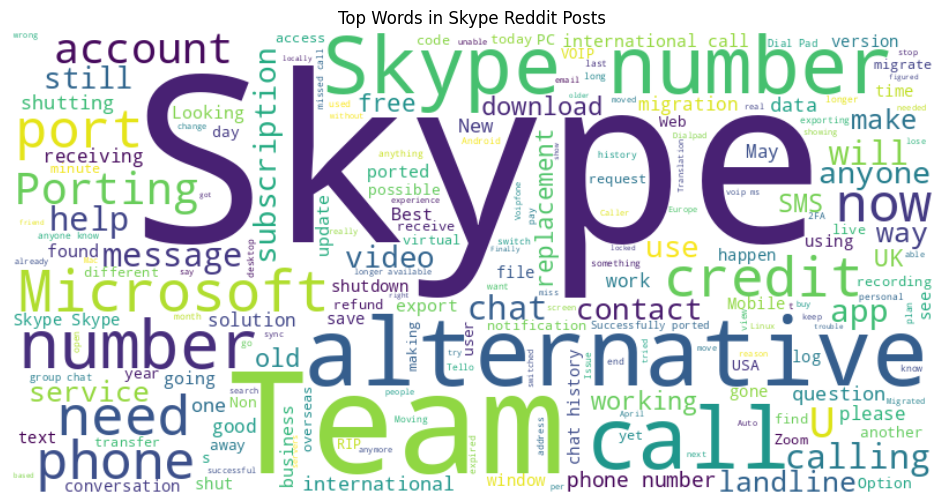

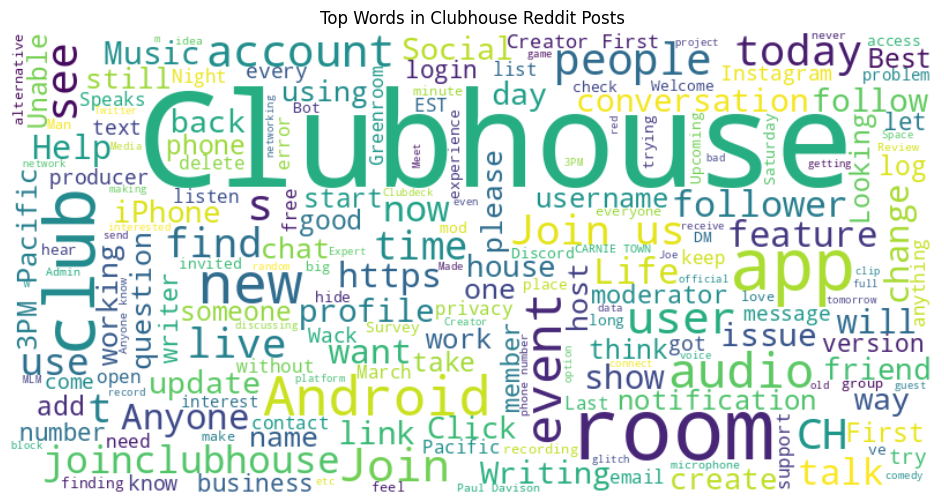

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# -----------------------------
# 1. Plot Google Trends over time
# -----------------------------
plt.figure(figsize=(14,6))
plt.plot(orkut_trends['month'], orkut_trends['interest'], label='Orkut', marker='o')
plt.plot(yahoo_trends['month'], yahoo_trends['interest'], label='Yahoo', marker='o')
plt.plot(skype_trends['month'], skype_trends['interest'], label='Skype', marker='o')
plt.plot(clubhouse_trends['month'], clubhouse_trends['interest'], label='Clubhouse', marker='o')
plt.title('Google Search Interest Over Time')
plt.xlabel('Month')
plt.ylabel('Interest')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 2. Average Sentiment Over Time
# -----------------------------
def plot_sentiment(sentiment_df, platform_name):
    # Calculate average sentiment
    avg_sentiment = sentiment_df['sentiment'].mean()
    plt.bar(platform_name, avg_sentiment, color='skyblue')

plt.figure(figsize=(10,6))
plot_sentiment(orkut_sentiment, 'Orkut')
plot_sentiment(yahoo_sentiment, 'Yahoo')
plot_sentiment(skype_sentiment, 'Skype')
plot_sentiment(clubhouse_sentiment, 'Clubhouse')
plt.title('Average Sentiment Across Platforms')
plt.ylabel('Average Sentiment Score')
plt.show()

# -----------------------------
# 3. WordCloud of Reddit Posts
# -----------------------------
def generate_wordcloud(reddit_df, platform_name):
    text = " ".join(reddit_df['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Top Words in {platform_name} Reddit Posts')
    plt.show()

generate_wordcloud(orkut_reddit, 'Orkut')
generate_wordcloud(yahoo_reddit, 'Yahoo')
generate_wordcloud(skype_reddit, 'Skype')
generate_wordcloud(clubhouse_reddit, 'Clubhouse')


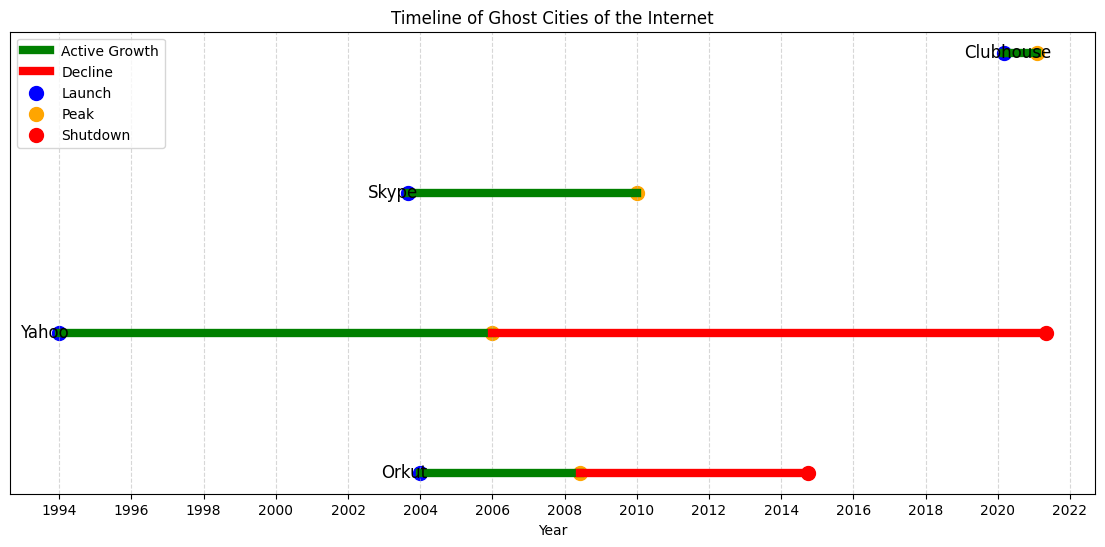

In [26]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# --- 1. Define key events for each platform ---
events = pd.DataFrame({
    'platform': ['Orkut', 'Yahoo', 'Skype', 'Clubhouse'],
    'launch': ['2004-01-01', '1994-01-01', '2003-08-29', '2020-03-01'],
    'peak':   ['2008-06-01', '2006-01-01', '2010-01-01', '2021-02-01'],
    'shutdown': ['2014-09-30', '2021-05-01', None, None]  # None if still alive/dying
})

# Convert to datetime
for col in ['launch', 'peak', 'shutdown']:
    events[col] = pd.to_datetime(events[col])

# --- 2. Plot timeline ---
fig, ax = plt.subplots(figsize=(14,6))

for idx, row in events.iterrows():
    y = idx  # vertical position for each platform
    ax.plot([row['launch'], row['peak']], [y, y], color='green', lw=6, label='Active Growth' if idx==0 else "")
    if pd.notna(row['shutdown']):
        ax.plot([row['peak'], row['shutdown']], [y, y], color='red', lw=6, label='Decline' if idx==0 else "")
    # Mark points
    ax.scatter(row['launch'], y, color='blue', s=100, label='Launch' if idx==0 else "")
    ax.scatter(row['peak'], y, color='orange', s=100, label='Peak' if idx==0 else "")
    if pd.notna(row['shutdown']):
        ax.scatter(row['shutdown'], y, color='red', s=100, label='Shutdown' if idx==0 else "")
    # Platform name
    ax.text(row['launch'] - pd.Timedelta(days=400), y, row['platform'], verticalalignment='center', fontsize=12)

# --- 3. Format plot ---
ax.set_yticks([])  # remove y-axis ticks
ax.set_xlabel('Year')
ax.set_title('Timeline of Ghost Cities of the Internet')
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(axis='x', linestyle='--', alpha=0.5)

# Only show one legend for each label
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper left')

plt.show()


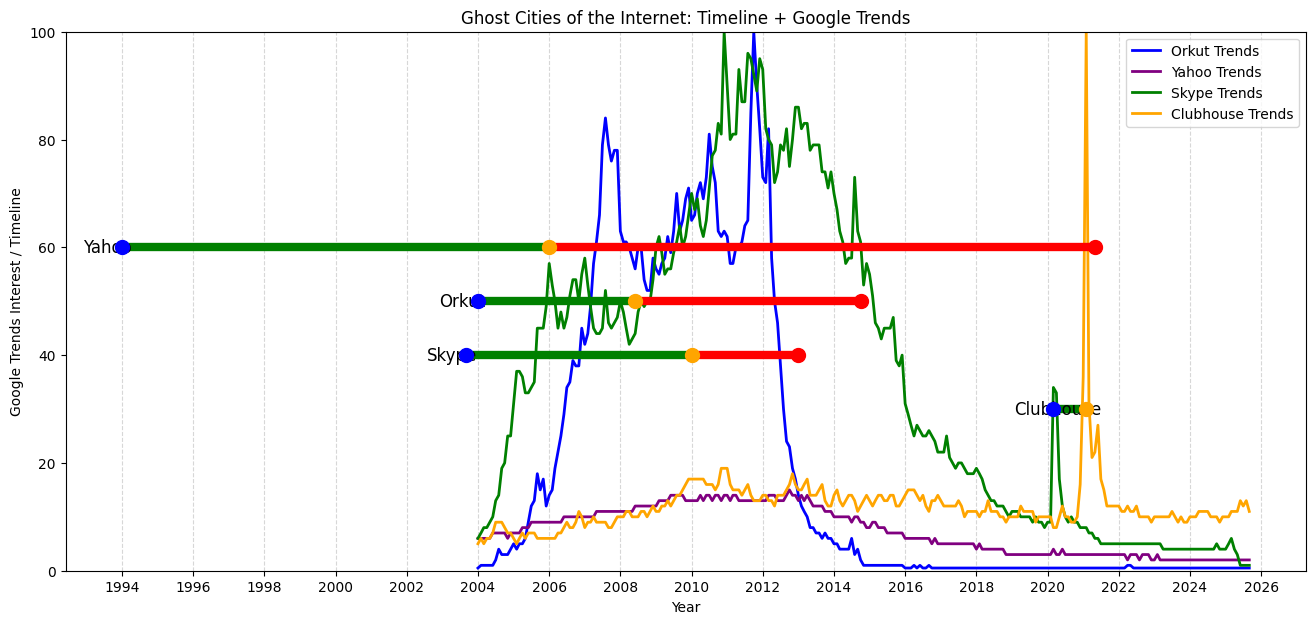

In [27]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# --- 1. Corrected events for timeline ---
events = pd.DataFrame({
    'platform': ['Orkut', 'Yahoo', 'Skype', 'Clubhouse'],
    'launch': ['2004-01-01', '1994-01-01', '2003-08-29', '2020-03-01'],
    'peak':   ['2008-06-01', '2006-01-01', '2010-01-01', '2021-02-01'],
    'shutdown': ['2014-09-30', '2021-05-01', '2012-12-31', None]  # Skype shutdown corrected
})
for col in ['launch', 'peak', 'shutdown']:
    events[col] = pd.to_datetime(events[col])

# --- 2. Plot setup ---
fig, ax = plt.subplots(figsize=(16,7))

# --- 3. Plot Google Trends lines for each platform ---
ax.plot(orkut_trends['month'], orkut_trends['interest'], label='Orkut Trends', color='blue', lw=2)
ax.plot(yahoo_trends['month'], yahoo_trends['interest'], label='Yahoo Trends', color='purple', lw=2)
ax.plot(skype_trends['month'], skype_trends['interest'], label='Skype Trends', color='green', lw=2)
ax.plot(clubhouse_trends['month'], clubhouse_trends['interest'], label='Clubhouse Trends', color='orange', lw=2)

# --- 4. Overlay timeline bars for growth/decline ---
y_positions = {'Orkut': 50, 'Yahoo': 60, 'Skype': 40, 'Clubhouse': 30}  # arbitrary vertical positions for bars

for idx, row in events.iterrows():
    y = y_positions[row['platform']]
    # Growth: launch -> peak
    ax.plot([row['launch'], row['peak']], [y, y], color='green', lw=6)
    # Decline: peak -> shutdown
    if pd.notna(row['shutdown']):
        ax.plot([row['peak'], row['shutdown']], [y, y], color='red', lw=6)
    # Markers
    ax.scatter(row['launch'], y, color='blue', s=100, zorder=5)
    ax.scatter(row['peak'], y, color='orange', s=100, zorder=5)
    if pd.notna(row['shutdown']):
        ax.scatter(row['shutdown'], y, color='red', s=100, zorder=5)
    # Platform label
    ax.text(row['launch'] - pd.Timedelta(days=400), y, row['platform'], verticalalignment='center', fontsize=12)

# --- 5. Format axes ---
ax.set_xlabel('Year')
ax.set_ylabel('Google Trends Interest / Timeline')
ax.set_title('Ghost Cities of the Internet: Timeline + Google Trends')
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(axis='x', linestyle='--', alpha=0.5)
ax.set_ylim(0, 100)

# --- 6. Legend ---
ax.legend(loc='upper right')
plt.show()


TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x794bfdc8dac0>.

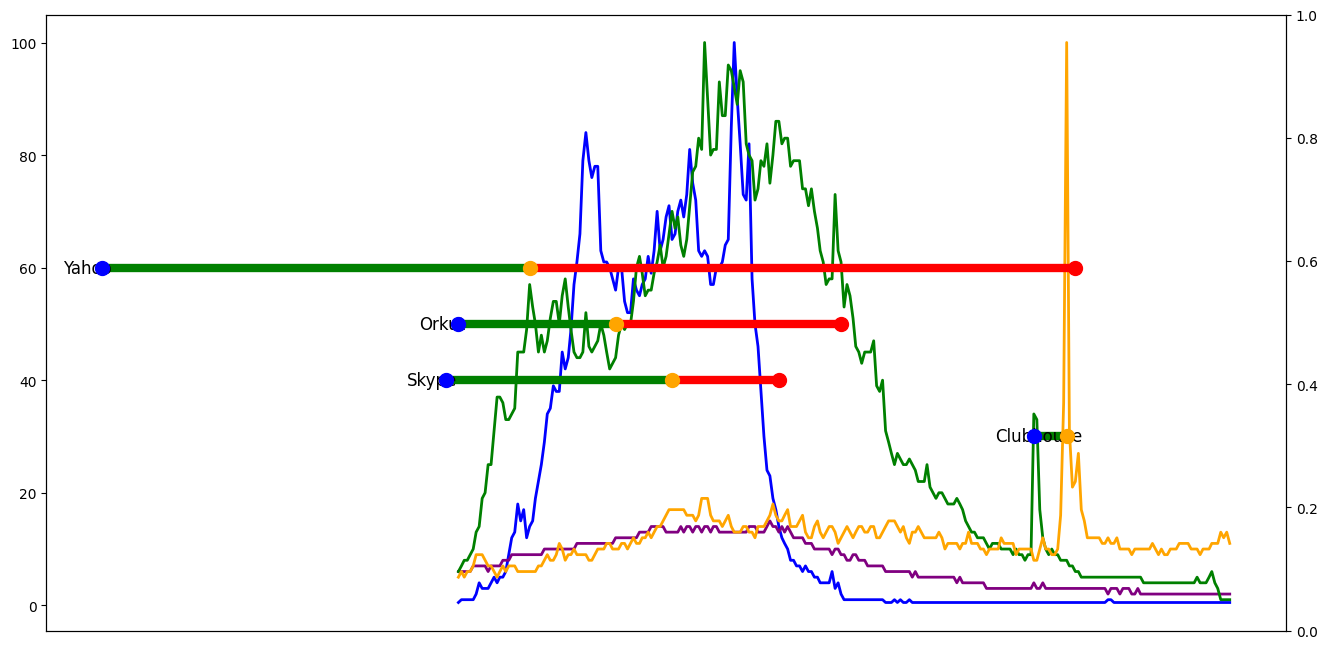

In [33]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# --- 1. Corrected events for timeline ---
events = pd.DataFrame({
    'platform': ['Orkut', 'Yahoo', 'Skype', 'Clubhouse'],
    'launch': ['2004-01-01', '1994-01-01', '2003-08-29', '2020-03-01'],
    'peak':   ['2008-06-01', '2006-01-01', '2010-01-01', '2021-02-01'],
    'shutdown': ['2014-09-30', '2021-05-01', '2012-12-31', None]
})
for col in ['launch', 'peak', 'shutdown']:
    events[col] = pd.to_datetime(events[col])

# --- 2. Compute overall average sentiment ---
avg_sentiment = {
    'Orkut': orkut_sentiment['sentiment'].mean(),
    'Yahoo': yahoo_sentiment['sentiment'].mean(),
    'Skype': skype_sentiment['sentiment'].mean(),
    'Clubhouse': clubhouse_sentiment['sentiment'].mean()
}

# --- 3. Plot Google Trends ---
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(orkut_trends['month'], orkut_trends['interest'], label='Orkut Trends', color='blue', lw=2)
ax.plot(yahoo_trends['month'], yahoo_trends['interest'], label='Yahoo Trends', color='purple', lw=2)
ax.plot(skype_trends['month'], skype_trends['interest'], label='Skype Trends', color='green', lw=2)
ax.plot(clubhouse_trends['month'], clubhouse_trends['interest'], label='Clubhouse Trends', color='orange', lw=2)

# --- 4. Overlay timeline bars ---
y_positions = {'Orkut': 50, 'Yahoo': 60, 'Skype': 40, 'Clubhouse': 30}
for idx, row in events.iterrows():
    y = y_positions[row['platform']]
    # Growth: launch -> peak
    ax.plot([row['launch'], row['peak']], [y, y], color='green', lw=6)
    # Decline: peak -> shutdown
    if pd.notna(row['shutdown']):
        ax.plot([row['peak'], row['shutdown']], [y, y], color='red', lw=6)
    # Markers
    ax.scatter(row['launch'], y, color='blue', s=100, zorder=5)
    ax.scatter(row['peak'], y, color='orange', s=100, zorder=5)
    if pd.notna(row['shutdown']):
        ax.scatter(row['shutdown'], y, color='red', s=100, zorder=5)
    # Platform label
    ax.text(row['launch'] - pd.Timedelta(days=400), y, row['platform'], verticalalignment='center', fontsize=12)

# --- 5. Plot average sentiment as bar chart (right side) ---
platforms = list(avg_sentiment.keys())
sent_values = list(avg_sentiment.values())
ax2 = ax.twinx()  # secondary y-axis
ax2.bar(platforms, [v*100 for v in sent_values], alpha=0.3, color=['blue','purple','green','orange'], label='Avg Sentiment')
ax2.set_ylabel('Overall Average Sentiment (%)')

# --- 6. Format axes ---
ax.set_xlabel('Year')
ax.set_ylabel('Google Trends Interest / Timeline')
ax.set_title('Ghost Cities of the Internet: Trends + Timeline + Overall Sentiment')
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(axis='x', linestyle='--', alpha=0.5)
ax.set_ylim(0, 100)

# --- 7. Legend ---
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
by_label = dict(zip(labels + labels2, handles + handles2))
a


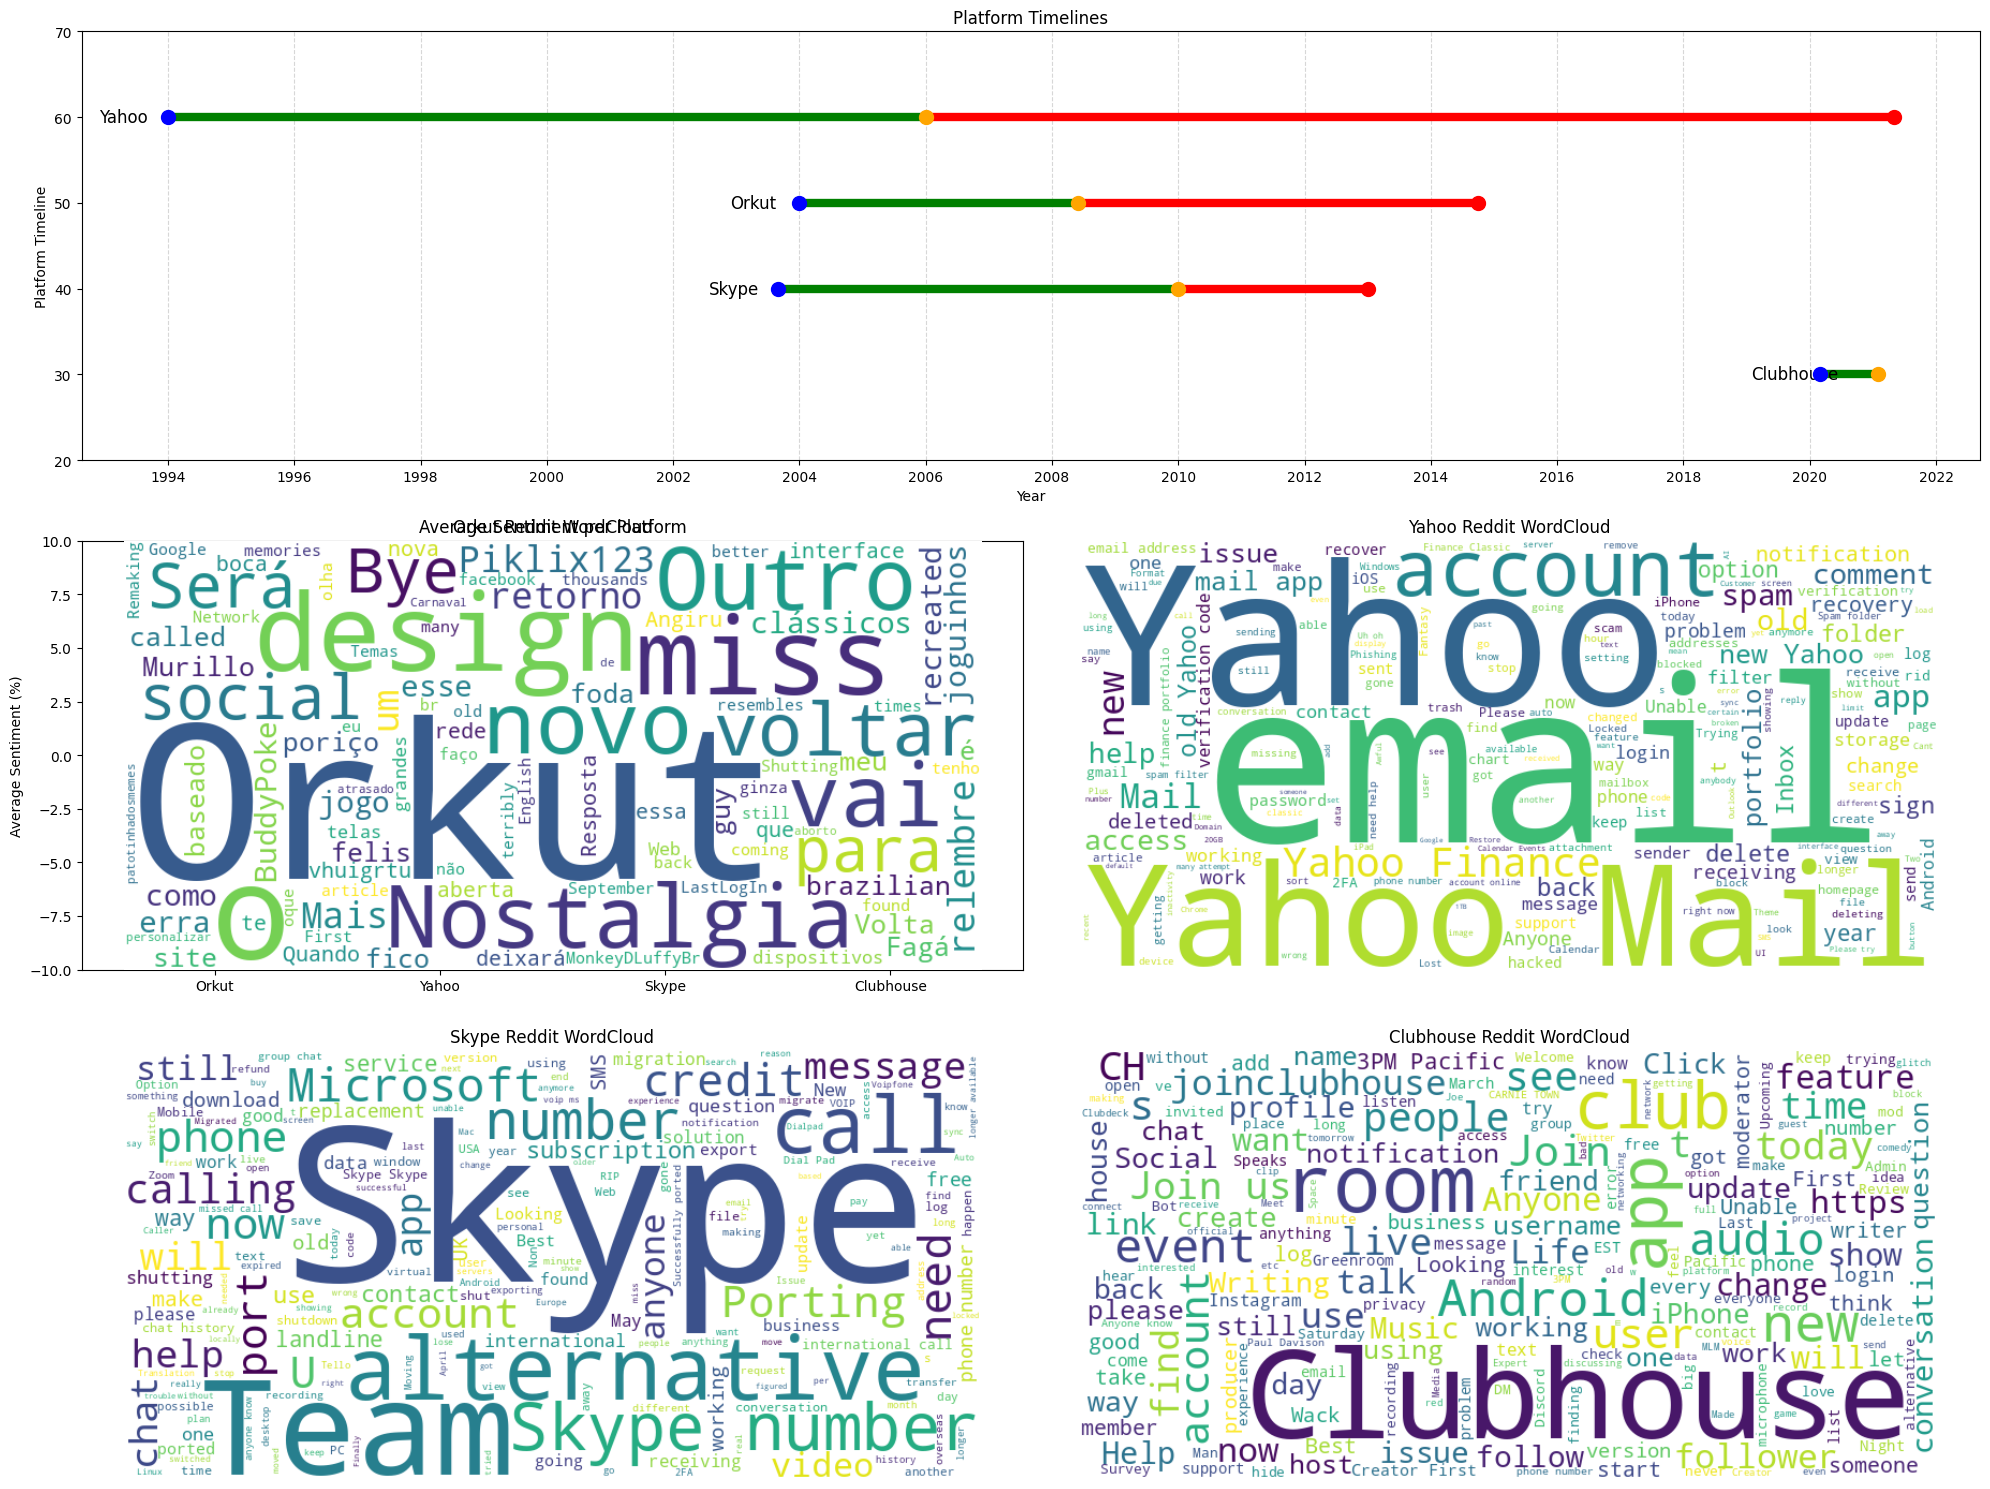

In [39]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from wordcloud import WordCloud
import pandas as pd

# Set up figure with multiple subplots
fig = plt.figure(figsize=(20, 15))

# --- Timeline subplot ---
ax1 = plt.subplot2grid((3,2), (0,0), colspan=2)
y_positions = {'Orkut':50,'Yahoo':60,'Skype':40,'Clubhouse':30}
for idx, row in events.iterrows():
    y = y_positions[row['platform']]
    ax1.plot([row['launch'], row['peak']], [y,y], color='green', lw=6)
    if pd.notna(row['shutdown']):
        ax1.plot([row['peak'], row['shutdown']], [y,y], color='red', lw=6)
    ax1.scatter(row['launch'], y, color='blue', s=100, zorder=5)
    ax1.scatter(row['peak'], y, color='orange', s=100, zorder=5)
    if pd.notna(row['shutdown']):
        ax1.scatter(row['shutdown'], y, color='red', s=100, zorder=5)
    ax1.text(row['launch'] - pd.Timedelta(days=400), y, row['platform'], va='center', fontsize=12)
ax1.set_title('Platform Timelines')
ax1.set_xlabel('Year')
ax1.set_ylabel('Platform Timeline')
ax1.xaxis.set_major_locator(mdates.YearLocator(2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.set_ylim(20,70)
ax1.grid(axis='x', linestyle='--', alpha=0.5)

# --- Average sentiment subplot ---
ax2 = plt.subplot2grid((3,2), (1,0))
# Recalculate avg_sentiment as it's not in the current kernel state
avg_sentiment = {
    'Orkut': orkut_sentiment['sentiment'].mean(),
    'Yahoo': yahoo_sentiment['sentiment'].mean(),
    'Skype': skype_sentiment['sentiment'].mean(),
    'Clubhouse': clubhouse_sentiment['sentiment'].mean()
}
ax2.bar(list(avg_sentiment.keys()), [v*100 for v in avg_sentiment.values()],
        color=['blue','purple','green','orange'], alpha=0.8)
ax2.set_ylabel('Average Sentiment (%)')
ax2.set_title('Average Sentiment per Platform')
ax2.set_ylim(-10, 10) # Adjust y-limit for better visualization of sentiment scores

# --- WordClouds subplot ---
platforms_reddit = {'Orkut':orkut_reddit, 'Yahoo':yahoo_reddit, 'Skype':skype_reddit, 'Clubhouse':clubhouse_reddit}
# Adjusting subplot grid placement for word clouds
for i, (platform, df) in enumerate(platforms_reddit.items()):
    # Place the first two in row 1, columns 0 and 1 (after sentiment)
    # Place the next two in row 2, columns 0 and 1
    row_idx = 1 + i // 2
    col_idx = i % 2
    ax = plt.subplot2grid((3,2), (row_idx, col_idx))
    text = " ".join(df['text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'{platform} Reddit WordCloud')

plt.tight_layout()
plt.savefig('Ghost_Cities_Portfolio.png', dpi=300)
plt.show()